In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from selenium.webdriver.chrome.options import Options  

import sqlite
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def getHTML(path):

    chr_options = Options()  
    chr_options.add_argument("--headless")  
    #Chrome must be installed! Other browser drivers are available
    driver = webdriver.Chrome(options = chr_options)
    driver.get(path)
    pageHTML = BeautifulSoup(driver.page_source, 'html.parser')
    driver.quit()

    return pageHTML

In [113]:
SScom = getHTML('https://www.ss.com/msg/en/real-estate/flats/riga/ilguciems/ajncd.html')

print(SScom.find("div", {"id": "msg_div_msg"}).text)




Pārdod tīru, gaišu dzīvokli pie parka. Vēsturiska vieta. Nav stūra, saulains, sauss, silts, virtuve, Istabas caurst. -izol, Slēgta kāpņu telpa, Koda atslēga, Ksosmētiskais remonts, Ar visām ērtībām. Zemi komunālie maksājumi. Ieeja no Lilijas iela. 

Cветлая 1 комнатная квартира в хорошем состоянии, сделан частичный ремонт. Вход с улицы Лилияс. Рядом парк. Квартира без долгов, без кредитов, не угловая. В квартире изолируемые комнаты, рядом парковка. Чистый подъезд с кодовым замком. 
Хорошее место расположение, рядом остановка общ. транспорта, магазины.Town:RigaRegion:IlguciemsStreet:Vilnas 18 [Karte]Rooms:1Area:29Floor:1/5Series:Chrusch.Type of house:BrickConvenience:All conveniencePrice:23 500 € (810.34 €/m²)


In [ ]:
kk = 'https://www.investing.com/funds/swedbank-fund-of-funds-30-e-acc-historical-data'
def priceScrape(iURL):
    driver = webdriver.Chrome() #Chrome must be installed! Other browser drivers are available
    driver.get(iURL)

    elem = driver.find_element_by_id("curr_table").get_attribute('innerHTML')
    txtE = str(elem).split('tbody')
    txt = txtE[1].split('tr>')[1:-1]
    tPrice = []
    tDate = []

    for t in txt:
        x = t.split('"')
        if len(x) != 1:
            tDate.append(str(x[4])[1:13])
            tPrice.append(float(x[5]))
    
    driver.quit()
    prices = pd.DataFrame({'Date':tDate, 'Price':tPrice})
    return prices

data = priceScrape(kk)
data.head()

In [ ]:
URLs = {'Swedbank Fund of Funds 30':'https://markets.ft.com/data/funds/tearsheet/historical?s=EE3600078648:EUR',\
       'Swedbank Fund of Funds 60':'https://markets.ft.com/data/funds/tearsheet/historical?s=EE3600078655:EUR',\
       'Swedbank Fund of Funds 100':'https://markets.ft.com/data/funds/tearsheet/historical?s=EE3600078663:EUR'}

In [ ]:
driver = webdriver.Chrome() #Chrome must be installed! Other browser drivers are available
driver.get(URLs['Swedbank Fund of Funds 30'])

try:
    table = driver.find_elements_by_xpath('/html/body/div[3]/div[2]/section[3]/div[1]/div/div/div[2]/div[2]/table/tbody')
    #table = driver.find_elements_by_class_name('table')
    
    #table = table.get_attribute('innerHTML')
    print(driver.page_source)
    
    for row in table:
        print(row)
finally:
    driver.quit()

print(table)

In [ ]:
from lxml import html, etree

driver = webdriver.Chrome()

try:
    driver.get('https://ibanka.seb.lv/cgi-bin/ipank/ipank.p?sesskey=&lang=LAT&act=VPFONDINFO&isin=LU0122754046')
    prices = driver.find_element_by_partial_link_text('.csv').get_attribute('href')
    data = str(driver.page_source)
finally:
    driver.close()

tree = html.fromstring(data)
#root = etree.Element(data)
print(prices)

In [67]:

for w in web:
    if w.find('input', {'name':'filters[]'}) != None:
        if w.find('input').get('id')[:8] == 'cb-Tegvk':
            if len(w.text) > 2:
                link = 'https://www.cv.lv' + w.find('a').get('href')
                print(str(w.text).split(' (')[0].strip(), link)
                print('------------------------------------------')

Prakse https://www.cv.lv/darba-sludinajumi/b-prakse-b
------------------------------------------
Administratīvais darbs / Asistēšana https://www.cv.lv/darba-sludinajumi/administrativais-darbs-asistesana
------------------------------------------
Bankas / Apdrošināšana https://www.cv.lv/darba-sludinajumi/bankas-apdrosinasana
------------------------------------------
Brīvprātīgo darbs https://www.cv.lv/darba-sludinajumi/brivpratigo-darbs
------------------------------------------
Būvniecība / Nekustamais īpašums https://www.cv.lv/darba-sludinajumi/buvnieciba-nekustamais-ipasums
------------------------------------------
Cilvēkresursi https://www.cv.lv/darba-sludinajumi/cilvekresursi
------------------------------------------
Drošība / Glābšanas dienesti / Aizsardzība https://www.cv.lv/darba-sludinajumi/drosiba-glabsanas-dienesti-aizsardziba
------------------------------------------
Elektronika / Telekomunikācijas https://www.cv.lv/darba-sludinajumi/elektronika-telekomunikacijas
-------

In [3]:
next_page = 'https://www.cv.lv/darba-sludinajumi/visi'
joblist = []
counter = 0

while next_page != None:
    cvlv = getHTML(next_page)
    jobs = cvlv.find('div', id='joblist').find_all('div', {'class':'offer_primary'})
    
    for o in jobs:
        title = o.find('h2').text
        company = o.find('span', {'itemprop':'hiringOrganization'}).text
        salary = o.find('span', {'class':'salary-blue'})
        place = o.find('span', {'itemprop':'jobLocation'}).text
        link = o.find('h2').find('a').get('href')
        date = o.find('span', {'itemprop':'datePosted'}).get('content')
        
        if o.find('span', {'itemprop':'jobLocation'}).find('a') != None:
            coordinates = o.find('span', {'itemprop':'jobLocation'}).find('a').get('href')
            coordinates = coordinates.split('=')[1].split('%3A')
            try:
                coordinates[0] = float(coordinates[0])
                coordinates[1] = float(coordinates[1])
            except ValueError:
                coordinates = 'Not found'
        else:
            coordinates = 'Not found'

        if salary != None:
            counter += 1
            print('#{}'.format(counter))
            print('TITLE: {}'.format(title))
            print('DATE: {}'.format(date))
            print(salary.text)
            joblist.append([title,company,link,place,coordinates,date,salary.text])
            print('========================================\n')
    
    if cvlv.find('li', {'class':'page_next'}).find('a') == None:
        break
    else:
        next_page = cvlv.find('li', {'class':'page_next'}).find('a').get('href')
        next_page = 'https://www.cv.lv' + str(next_page)

counter = None
job_list = pd.DataFrame(joblist, columns = list(['Title', 'Company', 'Link',
                                                 'Place', 'Coordinates', 
                                                 'Date', 'Salary']))
joblist = []
job_list.to_csv('Y:\\job_salaries.csv', encoding='utf-8')

#1
TITLE: AREA SALES MANAGER
DATE: 2018-12-07
Alga mēnesī: 1300.00 līdz 1600.00 EUR

#2
TITLE: BACK-END DEVELOPER
DATE: 2018-12-10
Alga mēnesī: 2200.00 līdz 2900.00 EUR

#3
TITLE: KLIENTU SERVISA UN ATBALSTA SPECIĀLISTS/-E
DATE: 2018-12-11
Alga mēnesī: 900.00 līdz 1200.00 EUR

#4
TITLE: PĀRDOŠANAS SPECIĀLISTS/-E EXPORTA JOMĀ
DATE: 2018-12-11
Alga mēnesī: 900.00 līdz 1000.00 EUR

#5
TITLE: PROGRAMMATŪRAS TESTĒŠANAS INŽENIERIS/-E
DATE: 2018-12-07
Alga mēnesī:  līdz 4200.00 EUR

#6
TITLE: CUSTOMER SERVICE SPECIALIST WITH SCANDINAVIAN OR FINNISH /2 POSITIONS AVAILABLE/
DATE: 2018-12-13
Alga mēnesī: 1270.00 EUR

#7
TITLE: NOLIKTAVAS PĀRZINI
DATE: 2018-12-03
Alga mēnesī: 1124.00 līdz 1405.00 EUR

#8
TITLE: JURISTS/-E
DATE: 2018-11-16
Stundas likme: 7.00 līdz 12.00 EUR

#9
TITLE: PROJEKTU VADĪTĀJA PALĪGU/-DZI
DATE: 2018-12-10
Stundas likme: 5.00 līdz 10.00 EUR

#10
TITLE: TIRDZNIECĪBAS PĀRSTĀVIS DARBAM AR CELTNIECĪBAS KOMPĀNIJĀM JELGAVĀ
DATE: 2018-12-13
Stundas likme: 4.20 līdz 6.00 EUR

#11


#85
TITLE: HEADHUNTER (FINANCE, GERMANY MARKET COVERAGE)
DATE: 2018-11-22
Alga mēnesī: 1400.00 līdz 5000.00 EUR

#86
TITLE: KLIENTU DRAUGS, "SKY" DUNTES IELĀ 19A (SARKANDAUGAVA)
DATE: 2018-11-26
Stundas likme: 3.24 līdz 3.66 EUR

#87
TITLE: FINANŠU PROJEKTU VADĪTĀJU
DATE: 2018-12-13
Alga mēnesī: 1300.00 līdz 1800.00 EUR

#88
TITLE: EKSPORTA MENEDŽERIS
DATE: 2018-12-13
Alga mēnesī: 1500.00 EUR

#89
TITLE: PROJEKTU ASISTENTS/-E (TULKS)
DATE: 2018-12-13
Alga mēnesī: 1700.00 līdz 2100.00 EUR

#90
TITLE: .NET DEVELOPER (SENIOR)
DATE: 2018-12-13
Alga mēnesī: 2566.00 līdz 4326.00 EUR

#91
TITLE: TRANSPORTLĪDZEKĻU VADĪTĀJU KVALIFIKĀCIJAS INSPEKTORS
DATE: 2018-12-13
Stundas likme: 4.03 līdz 4.91 EUR

#92
TITLE: SYSTEMS/REQUIREMENT ANALYST
DATE: 2018-12-13
Alga mēnesī: 2600.00 līdz 3500.00 EUR

#93
TITLE: NOLIKTAVAS STRĀDNIEKS/-CE
DATE: 2018-12-13
Alga mēnesī: 700.00 līdz 900.00 EUR

#94
TITLE: IT LIETOTĀJU ATBALSTA SPECIĀLISTS/-E
DATE: 2018-12-13
Alga mēnesī: 1250.00 līdz 1650.00 EUR

#95
TITLE


#155
TITLE: ORACLE APPLICATIONS ADMINISTRATOR
DATE: 2018-12-13
Alga mēnesī:  līdz 3500.00 EUR

#156
TITLE: KVALITĀTES VADĪBAS SISTĒMAS SPECIĀLISTS/-E
DATE: 2018-12-07
Alga mēnesī: 1000.00 līdz 1600.00 EUR

#157
TITLE: NOMAS PROJEKTU VADĪTĀJS/-A
DATE: 2018-12-13
Alga mēnesī: 1850.00 līdz 2550.00 EUR

#158
TITLE: ALGU GRĀMATVEDIS/-E
DATE: 2018-12-13
Alga mēnesī: 1300.00 līdz 1600.00 EUR

#159
TITLE: PROJEKTU VADĪTĀJS/-A (UZŅĒMUMU FINANSĒŠANAS JOMĀ)
DATE: 2018-12-07
Alga mēnesī: 1600.00 līdz 2100.00 EUR

#160
TITLE: PERSONĀLA E-APMĀCĪBU SPECIĀLISTS/-E
DATE: 2018-12-10
Alga mēnesī: 700.00 līdz 1000.00 EUR

#161
TITLE: TRANSPORTLĪDZEKĻU TEHNISKĀS KONTROLES INSPEKTORS/-E
DATE: 2018-11-20
Stundas likme: 6.90 līdz 9.79 EUR

#162
TITLE: MĀRKETINGA DIREKTORS/-E
DATE: 2018-11-22
Alga mēnesī: 2000.00 līdz 3000.00 EUR

#163
TITLE: BĀRMENIM/-EI
DATE: 2018-12-13
Stundas likme: 4.20 līdz 5.40 EUR

#164
TITLE: RECRUITMENT CONSULTANT (BANKING, SWITZERLAND MARKET COVERAGE)
DATE: 2018-11-21
Alga mēnesī: 


#226
TITLE: PĀRDOŠANAS SPECIĀLISTS/-E EXPORTA JOMĀ
DATE: 2018-12-11
Alga mēnesī: 900.00 līdz 1000.00 EUR

#227
TITLE: LABORATORIJAS ĀRSTS
DATE: 2018-12-11
Alga mēnesī: 946.00 EUR

#228
TITLE: CONSULTANT IN ADVISORY - IT AUDITOR
DATE: 2018-12-11
Alga mēnesī: 1500.00 līdz 2500.00 EUR

#229
TITLE: PRAKSE RISKU KONSULTĀCIJU DEPARTAMENTĀ (DECEMBRIS 2018-MARTS 2019)
DATE: 2018-12-11
Alga mēnesī:  līdz 430.00 EUR

#230
TITLE: ZVANU CENTRA OPERATORS
DATE: 2018-12-11
Stundas likme: 4.50 līdz 6.50 EUR

#231
TITLE: IEKĀRTU MEHĀNIĶIS ASFALTBETONA RAŽOŠANAS RŪPNĪCĀ, VANGAŽOS
DATE: 2018-12-11
Stundas likme: 6.80 EUR

#232
TITLE: KLIENTU SERVISA UN ATBALSTA SPECIĀLISTS/-E
DATE: 2018-12-11
Alga mēnesī: 900.00 līdz 1200.00 EUR

#233
TITLE: RETAIL SPECIALIST-MANAGER ASSISTANT
DATE: 2018-12-11
Alga mēnesī: 800.00 līdz 1100.00 EUR

#234
TITLE: AUTOVADĪTĀJS AR "B" KATEGORIJU
DATE: 2018-12-11
Alga mēnesī: 982.00 līdz 1150.00 EUR

#235
TITLE: PERSONĀLA VADĪTĀJA/-S
DATE: 2018-12-11
Alga mēnesī: 1440.00 līdz 

DATE: 2018-12-05
Alga mēnesī: 840.00 līdz 1120.00 EUR

#317
TITLE: PREZENTĀCIJU SPECIĀLISTS
DATE: 2018-12-05
Alga mēnesī: 400.00 līdz 1300.00 EUR

#318
TITLE: СПЕЦИАЛИСТ ПО ПРОДАЖАМ!
DATE: 2018-12-05
Alga mēnesī: 600.00 līdz 1600.00 EUR

#319
TITLE: RAŽOŠANAS VADĪTĀJA ASISTENTU/-I
DATE: 2018-12-05
Alga mēnesī: 850.00 līdz 1125.00 EUR

#320
TITLE: PĀRDEVĒJS
DATE: 2018-12-05
Alga mēnesī: 600.00 līdz 1200.00 EUR

#321
TITLE: PĀRDOŠANAS KOORDINATORS / SALES COORDINATOR
DATE: 2018-12-05
Alga mēnesī: 600.00 līdz 1500.00 EUR

#322
TITLE: TRANSACTION ADVISORY CONSULTANT
DATE: 2018-12-05
Alga mēnesī: 1100.00 līdz 1400.00 EUR

#323
TITLE: PĀRDEVĒJS- KONSULTANTS
DATE: 2018-12-05
Stundas likme: 4.00 EUR

#324
TITLE: Data Analyst in HR
DATE: 2018-12-05
Alga mēnesī: 1500.00 līdz 2000.00 EUR

#325
TITLE: Change manager to SEB Baltic Organization
DATE: 2018-12-05
Alga mēnesī: 1900.00 līdz 2600.00 EUR

#326
TITLE: KLIENTU APKALPOŠANAS MENEDŽERIS/-E/ ADMINISTRATORS/-E
DATE: 2018-12-05
Alga mēnesī: 900.0

TITLE: PĀRDEVĒJU - KONSULTANTU/-I
DATE: 2018-11-29
Stundas likme: 4.00 EUR

#411
TITLE: PĀRDOŠANAS MENEDŽERIS \ МЕНЕДЖЕР ПРОДАЖ 
DATE: 2018-11-29
Alga mēnesī: 710.00 līdz 710.00 EUR

#412
TITLE: BŪVNIECĪBAS PROJEKTU VADĪTĀJS/-A
DATE: 2018-11-29
Alga mēnesī: 1200.00 līdz 2200.00 EUR

#413
TITLE: CUSTOMER SERVICE COORDINATOR (DOCUMENTATION TEAM)
DATE: 2018-11-29
Alga mēnesī: 1000.00 līdz 1300.00 EUR

#414
TITLE: TIRDZNIECĪBAS ASISTENTS/-E
DATE: 2018-11-29
Alga mēnesī: 1124.00 EUR

#415
TITLE: CLIENT SUPPORT SPECIALIST
DATE: 2018-11-29
Alga mēnesī: 1400.00 EUR

#416
TITLE: PĀRDOŠANAS SPECIĀLISTU/-I AR KARJERAS IZAUGSMES IESPĒJĀM
DATE: 2018-11-29
Alga mēnesī: 900.00 EUR

#417
TITLE: KLIENTU SPECIĀLISTU/-I
DATE: 2018-11-29
Alga mēnesī: 1124.00 līdz 1405.00 EUR

#418
TITLE: PROJEKTU ASISTENTS/-E
DATE: 2018-11-29
Alga mēnesī: 500.00 līdz 1000.00 EUR

#419
TITLE: BIROJA ADMINISTRATORS/-E
DATE: 2018-11-29
Alga mēnesī: 983.00 EUR

#420
TITLE: KRAVAS AUTOMAŠĪNAS ŠOFERIS AR CE KATEGORIJAS TIESĪBĀM

#480
TITLE: Pārdevējs/-a CircleK Brīvības ielā 176A
DATE: 2018-11-12
Stundas likme: 4.35 līdz 8.70 EUR

#481
TITLE: MEDIA BUYER
DATE: 2018-11-12
Alga mēnesī: 2000.00 EUR

#482
TITLE: ULTRASONOGRĀFIJAS SPECIĀLISTU
DATE: 2018-11-12
Stundas likme: 43.00 EUR

#483
TITLE: KLIENTU KONSULTANTS/-E AR DĀŅU VALODAS ZINĀŠANĀM
DATE: 2018-11-06
Alga mēnesī: 1300.00 līdz 1500.00 EUR

#484
TITLE: REVIDENTA PALĪGS/-DZE 
DATE: 2018-10-25
Alga mēnesī: 1200.00 līdz 1600.00 EUR

#485
TITLE: VECĀKAIS REVIDENTS/-E 
DATE: 2018-10-25
Alga mēnesī: 2000.00 līdz 2400.00 EUR

#486
TITLE: REVIDENTS/-E 
DATE: 2018-10-25
Alga mēnesī: 1600.00 līdz 2000.00 EUR

#487
TITLE: Pārdevējs/-a Rīga
DATE: 2018-10-15
Stundas likme: 4.35 līdz 8.70 EUR

#488
TITLE: DEBITORU KONSULTANTS/-E
DATE: 2018-10-12
Alga mēnesī: 841.00 līdz 1459.00 EUR

#489
TITLE: DATA ADMINISTRATION JUNIOR SPECIALIST
DATE: 2018-10-01
Alga mēnesī: 830.00 EUR

#490
TITLE: VĀCU VALODAS GURU
DATE: 2018-09-04
Alga mēnesī: 700.00 līdz 3000.00 EUR

#491
TITLE: A

TITLE: CUSTOMER SUPPORT OFFICER WITH SWEDISH LANGUAGE SKILLS
DATE: 2018-11-15
Alga mēnesī: 1833.00 EUR

#554
TITLE: PHP DEVELOPER
DATE: 2018-11-22
Alga mēnesī: 1000.00 līdz 3500.00 EUR

#555
TITLE: BITES SALONA PĀRDOŠANAS SPECIĀLISTS RĪGĀ
DATE: 2018-12-12
Alga mēnesī: 800.00 līdz 1300.00 EUR

#556
TITLE: PROGRAMMATŪRAS IZSTRĀDĀTĀJS
DATE: 2018-11-21
Alga mēnesī: 1250.00 līdz 2100.00 EUR

#557
TITLE: LIETOTĀJU ATBALSTA SPECIĀLISTS/-E
DATE: 2018-11-26
Alga mēnesī: 950.00 līdz 1250.00 EUR

#558
TITLE: SŪTĪJUMU APMAIŅAS SPECIĀLISTS/- E
DATE: 2018-12-10
Alga mēnesī: 750.00 EUR

#559
TITLE: JUNIOR DWH ADMINISTRATOR
DATE: 2018-11-15
Alga mēnesī: 1125.00 līdz 1425.00 EUR

#560
TITLE: DATU ANALĪTIĶIS UZ NOTEIKTU LAIKU
DATE: 2018-11-29
Alga mēnesī: 1200.00 līdz 1600.00 EUR

#561
TITLE: BITES SALONA PĀRDOŠANAS SPECIĀLISTS TUKUMĀ
DATE: 2018-12-12
Alga mēnesī: 600.00 līdz 1000.00 EUR

#562
TITLE: ACCOUNTANT
DATE: 2018-12-05
Alga mēnesī: 800.00 EUR

#563
TITLE: FINANŠU KONTROLIERIS/-E
DATE: 2018-12-1

#637
TITLE: COLLECTIONS COORDINATOR
DATE: 2018-12-11
Alga mēnesī: 925.00 EUR

#638
TITLE: KLIENTU SERVISA NODAĻAS PĀRDEVĒJS/PAKALPOJUMU KOORDINĀTORS
DATE: 2018-12-11
Stundas likme: 5.00 EUR

#639
TITLE: BARISTA
DATE: 2018-12-11
Alga mēnesī: 1000.00 līdz 1500.00 EUR

#640
TITLE: BAR WAITER/-ESS
DATE: 2018-12-11
Alga mēnesī: 1200.00 līdz 1600.00 EUR

#641
TITLE: STEAK HOUSE SERVERS
DATE: 2018-12-11
Alga mēnesī: 1200.00 līdz 1800.00 EUR

#642
TITLE: ASSISTANT WAITRESS
DATE: 2018-12-11
Alga mēnesī: 1000.00 līdz 1500.00 EUR

#643
TITLE: ATSLĒDZNIEKS/CE AR MAG METINĀŠANAS PRASMĒM
DATE: 2018-12-11
Stundas likme: 13.50 EUR

#644
TITLE: KRAVAS AUTOVADĪTĀJS/-A
DATE: 2018-12-11
Alga mēnesī: 115.00 EUR

#645
TITLE: VECĀKAIS SPECIĀLISTS/-E KOMUNIKĀCIJAS NODROŠINĀJUMA NODAĻĀ
DATE: 2018-12-11
Alga mēnesī: 1400.00 EUR

#646
TITLE: SENIOR FRONT-END DEVELOPER
DATE: 2018-11-27
Alga mēnesī: 2500.00 līdz 5000.00 EUR

#647
TITLE: PORTFOLIO FINANCIAL RISK ANALYST
DATE: 2018-11-27
Alga mēnesī: 1000.00 līdz 30

#724
TITLE: PĒTĪJUMU VADĪTĀJU
DATE: 2018-11-23
Alga mēnesī: 1000.00 EUR

#725
TITLE: RAŽOŠANAS VADĪTĀJS/-A
DATE: 2018-12-11
Alga mēnesī: 2000.00 līdz 3000.00 EUR

#726
TITLE: PĒTĪJUMU ASISTENTU
DATE: 2018-11-23
Alga mēnesī: 800.00 EUR

#727
TITLE: GARŠU PAVĒLNIEKS/CE - PAVĀRS HIPOKTRĀTA IELĀ 28, RĪGĀ (MEŽCIEMS)
DATE: 2018-11-20
Stundas likme: 3.84 līdz 4.84 EUR

#728
TITLE: TRANSPORTLĪDZEKĻU TEHNISKĀS KONTROLES INSPEKTORS
DATE: 2018-12-03
Alga mēnesī: 750.00 līdz 1200.00 EUR

#729
TITLE: IZEJOŠO ZVANU TĀLRUŅA OPERATORS
DATE: 2018-12-11
Alga mēnesī: 560.00 līdz 3000.00 EUR

#730
TITLE: ИНЖЕНЕР НАЗЕМНОГО ОБОРУДОВАНИЯ АЭРОПОРТА
DATE: 2018-12-11
Alga mēnesī: 1500.00 līdz 2000.00 EUR

#731
TITLE: APAKŠUZŅĒMĒJU KVALITĀTES KONTROLIERIS/-E
DATE: 2018-12-11
Alga mēnesī: 1120.00 līdz 1690.00 EUR

#732
TITLE: DZĪVES SALDINĀTĀJS -KONDITORS LIELVEIKALĀ "SKY"
DATE: 2018-11-23
Stundas likme: 3.98 līdz 4.88 EUR

#733
TITLE: SPĒĻU AUTOMĀTU KAZINO APKALPOJOŠAIS PERSONĀLS RĪGĀ, RAIŅA BULVĀRĪ 15 (UZ NOEIK

TITLE: DATU IEVADES OPERATORS / -E
DATE: 2018-11-29
Alga mēnesī: 632.00 EUR

#824
TITLE: ZĀLES DARBINIEKS - ELEKTROIEKRĀVĒJA VADĪTĀJS
DATE: 2018-12-03
Alga mēnesī: 735.00 līdz 775.00 EUR

#825
TITLE: MĀRKETINGA UN PRODUKTU SORTIMENTA ATTĪSTĪBAS  SPECIĀLISTU/-I
DATE: 2018-12-10
Alga mēnesī: 900.00 līdz 1500.00 EUR

#826
TITLE: PĀRDOŠANAS AĢENTS/-E 007
DATE: 2018-11-22
Alga mēnesī: 840.00 līdz 1340.00 EUR

#827
TITLE: SERVISA INŽENIERIS
DATE: 2018-12-10
Alga mēnesī: 1123.00 līdz 1900.00 EUR

#828
TITLE: PRAKTIKANTS (-E) TIESVEDĪBAS UN JURIDISKĀ ATBALSTA NODAĻĀ
DATE: 2018-12-10
Alga mēnesī: 430.00 EUR

#829
TITLE: BIROJA ADMINISTRATORS/-E
DATE: 2018-12-10
Stundas likme: 3.00 līdz 5.95 EUR

#830
TITLE: TOUR LEADER
DATE: 2018-12-10
Alga mēnesī: 800.00 līdz 2000.00 EUR

#831
TITLE: ZVIEDRU VALODAS PASNIEDZĒJS/-A
DATE: 2018-12-10
Alga mēnesī: 1000.00 EUR

#832
TITLE: SAIMNIECĪBAS DAĻAS VADĪTĀJS/A  / APSAIMNIEKOŠANAS VADĪTĀJS/A
DATE: 2018-12-03
Alga mēnesī: 1400.00 EUR

#833
TITLE: KONDITORS -

#922
TITLE: STĀVA INSPEKTORI/-ES
DATE: 2018-12-07
Alga mēnesī: 1500.00 līdz 1600.00 EUR

#923
TITLE: SAIMNIECĪBAS DAĻAS VADĪTĀJA PALĪGI/-DZES
DATE: 2018-12-07
Alga mēnesī: 1600.00 līdz 2000.00 EUR

#924
TITLE: LIETOTU AUTOMAŠĪNU PĀRDEVĒJU-KONSULTANTU/-I
DATE: 2018-12-07
Alga mēnesī: 1100.00 līdz 2800.00 EUR

#925
TITLE: AUTOMAŠĪNU VĒRTĒTĀJU
DATE: 2018-12-07
Alga mēnesī: 1200.00 līdz 1700.00 EUR

#926
TITLE: WEB IZSTRĀDĀTĀJS  
DATE: 2018-12-07
Alga mēnesī: 1000.00 EUR

#927
TITLE: MIG MAG METINĀTĀJS
DATE: 2018-12-07
Stundas likme: 12.00 līdz 13.00 EUR

#928
TITLE: VĀJSTRĀVAS TĪKLU SPECIĀLISTS/-E
DATE: 2018-12-07
Stundas likme: 700.00 līdz 1000.00 EUR

#929
TITLE: KLIENTU APKALPOŠANAS SPECIĀLISTS/-E
DATE: 2018-12-07
Alga mēnesī: 750.00 līdz 870.00 EUR

#930
TITLE: ELEKTRIĶIS/-E
DATE: 2018-12-07
Stundas likme: 13.00 EUR

#931
TITLE: PARĀDU PIEDZIŅAS SPECIĀLISTS/-E
DATE: 2018-12-05
Alga mēnesī: 880.00 EUR

#932
TITLE: ELEKTRIĶIS/-E
DATE: 2018-12-07
Stundas likme: 13.00 līdz 13.00 EUR

#933

TITLE: BITES SALONA PĀRDOŠANAS SPECIĀLISTS KULDĪGĀ
DATE: 2018-12-06
Alga mēnesī: 600.00 līdz 1000.00 EUR

#1028
TITLE: TELEMĀRKETINGA SPECIĀLISTS/-E/ KLIENTU KONSULTANTS/-E
DATE: 2018-12-06
Alga mēnesī: 850.00 līdz 920.00 EUR

#1029
TITLE: JUNIOR SOFTWARE DEVELOPER (BUSINESS APPLICATIONS)
DATE: 2018-12-06
Alga mēnesī: 850.00 EUR

#1030
TITLE: BILANCSPĒJĪGU GRĀMATVEDI
DATE: 2018-11-29
Alga mēnesī: 1320.00 EUR

#1031
TITLE: KLIENTU APKALPOŠANAS SPECIĀLISTS/-E
DATE: 2018-12-06
Stundas likme: 4.35 EUR

#1032
TITLE: SAIMNIECĪBAS PĀRZINIS, TEHNIĶIS
DATE: 2018-12-06
Alga mēnesī: 850.00 līdz 1100.00 EUR

#1033
TITLE: PROJEKTU VADĪTĀJU
DATE: 2018-12-06
Alga mēnesī: 912.00 līdz 1300.00 EUR

#1034
TITLE: PREČU KATEGORIJU ATBALSTA ASISTENTS/-E
DATE: 2018-12-06
Alga mēnesī: 550.00 līdz 800.00 EUR

#1035
TITLE: KLIENTU MENEDŽERIS/-E T/C "DOMINA"
DATE: 2018-12-06
Alga mēnesī: 1200.00 EUR

#1036
TITLE: TEHNIKAS MEHĀNIĶI  VALMIERĀ
DATE: 2018-11-28
Alga mēnesī: 1200.00 līdz 1800.00 EUR

#1037
TITLE: KLI

#1103
TITLE: PĀRDEVĒJS-KASIERIS
DATE: 2018-12-04
Stundas likme: 4.03 līdz 4.24 EUR

#1104
TITLE: APDROŠINĀŠANAS ATLĪDZĪBU NODAĻAS TEHNISKAIS EKSPERTS
DATE: 2018-12-04
Alga mēnesī: 1410.00 līdz 2860.00 EUR

#1105
TITLE: PURCHASING INTERN
DATE: 2018-12-04
Alga mēnesī: 450.00 EUR

#1106
TITLE: IT BUSINESS ANALYST
DATE: 2018-12-04
Alga mēnesī: 2600.00 līdz 3300.00 EUR

#1107
TITLE: RAŽOŠANAS DISPEČERS/-E
DATE: 2018-12-04
Stundas likme: 5.70 EUR

#1108
TITLE: LOĢISTIKAS STRUKTŪRVIENĪBAS VADĪTĀJU
DATE: 2018-12-04
Alga mēnesī: 2100.00 līdz 3000.00 EUR

#1109
TITLE: KREDĪTU ANALĪTIĶIS/-E
DATE: 2018-12-04
Alga mēnesī: 2000.00 līdz 3000.00 EUR

#1110
TITLE: WEB ATTĪSTĪBAS SPECIĀLISTS/-E
DATE: 2018-12-04
Alga mēnesī: 1750.00 līdz 2200.00 EUR

#1111
TITLE: PROJEKTU VADĪTĀJS/-A
DATE: 2018-12-04
Alga mēnesī: 1738.00 līdz 2369.00 EUR

#1112
TITLE: CITADELE "SKY BRANCH" PĀRDOŠANAS SPECIĀLISTS/-E
DATE: 2018-12-04
Stundas likme: 6.36 līdz 6.80 EUR

#1113
TITLE: SANTEHNIĶIS/-E
DATE: 2018-12-04
Stundas li

Alga mēnesī: 1300.00 līdz 2000.00 EUR

#1163
TITLE: ELEKTRIĶIS
DATE: 2018-11-15
Stundas likme: 5.10 EUR

#1164
TITLE: UX RESEARCHER
DATE: 2018-11-30
Alga mēnesī: 2127.00 EUR

#1165
TITLE: DIGITAL ADVERTISING SPECIALIST
DATE: 2018-11-30
Alga mēnesī: 1000.00 EUR

#1166
TITLE: SIZEER VEIKALA VADĪTĀJA VIETNIEKS/-CE TC PLAZA
DATE: 2018-11-30
Alga mēnesī: 700.00 līdz 850.00 EUR

#1167
TITLE: SIZEER KLIENTU KONSULTANTS/-E TC PLAZA, TC ALFA
DATE: 2018-11-30
Alga mēnesī: 600.00 līdz 670.00 EUR

#1168
TITLE: BIROJA ADMINISTRATORU/-I
DATE: 2018-11-30
Alga mēnesī: 950.00 līdz 1150.00 EUR

#1169
TITLE: E-COMMERCE SALES SPECIALIST
DATE: 2018-11-30
Alga mēnesī: 1400.00 EUR

#1170
TITLE: PIENA PRODUKTU PĀRSTRĀDĀTĀJS
DATE: 2018-11-30
Alga mēnesī: 850.00 līdz 1000.00 EUR

#1171
TITLE: KLIENTU KONSULTANTI/-ES
DATE: 2018-11-30
Alga mēnesī: 600.00 līdz 1000.00 EUR

#1172
TITLE: GRĀMATVEDE (JŪRMALĀ)
DATE: 2018-11-30
Alga mēnesī: 1055.00 EUR

#1173
TITLE: MANIKĪRA MEISTARE
DATE: 2018-11-30
Alga mēnesī: 1000.

#1244
TITLE: DEMI CHEF DE PARTIE PASTRY
DATE: 2018-11-28
Alga mēnesī: 1200.00 līdz 1800.00 EUR

#1245
TITLE: HEAD BAKER
DATE: 2018-11-28
Alga mēnesī: 3000.00 līdz 3450.00 EUR

#1246
TITLE: DEMI CHEF DE PARTIE
DATE: 2018-11-28
Alga mēnesī: 1100.00 līdz 1500.00 EUR

#1247
TITLE: VENTILĀCIJAS UN AUKSTUMA IEKĀRTU SPECIĀLISTU
DATE: 2018-11-28
Alga mēnesī: 1250.00 EUR

#1248
TITLE: CHEF DE PARTIE
DATE: 2018-11-28
Alga mēnesī: 1700.00 līdz 2000.00 EUR

#1249
TITLE: JAPANESE CHEF DE PARTIE - SUSHI
DATE: 2018-11-28
Alga mēnesī: 1700.00 līdz 2000.00 EUR

#1250
TITLE: PIEGĀDES UN SERVISA PROCESU VADĪTĀJS /-A
DATE: 2018-11-28
Alga mēnesī: 1200.00 līdz 1540.00 EUR

#1251
TITLE: VIESMĪLIS/-E
DATE: 2018-11-28
Stundas likme: 4.49 EUR

#1252
TITLE: ENGINEERS AND SCIENTISTS – CAREER AS A EUROPEAN PATENT EXAMINER
DATE: 2018-11-28
Alga mēnesī: 5500.00 līdz 7800.00 EUR

#1253
TITLE: PROJEKTU/BŪVDARBU VADĪTĀJS
DATE: 2018-11-28
Alga mēnesī: 1500.00 līdz 3000.00 EUR

#1254
TITLE: DATUBĀZES ADMINISTRATORS/E
DA

#1313
TITLE: SECURITY TESTER
DATE: 2018-11-26
Alga mēnesī: 2400.00 līdz 4800.00 EUR

#1314
TITLE: DEVELOPER FOR ANDROID PLATFORM
DATE: 2018-11-26
Alga mēnesī: 2400.00 līdz 4800.00 EUR

#1315
TITLE: TIRDZNIECĪBAS MENEDŽERIS/E BALTIC DATA VEIKALOS RĪGĀ
DATE: 2018-11-13
Alga mēnesī: 560.00 līdz 1000.00 EUR

#1316
TITLE: SATURA MĀRKETINGA SPECIĀLISTS/-E
DATE: 2018-11-26
Alga mēnesī: 1000.00 līdz 1500.00 EUR

#1317
TITLE: DEVELOPER FOR WINDOWS PLATFORM
DATE: 2018-11-26
Alga mēnesī: 2400.00 līdz 4800.00 EUR

#1318
TITLE: DEVELOPER FOR RESEARCH PROJECTS
DATE: 2018-11-26
Alga mēnesī: 900.00 līdz 2500.00 EUR

#1319
TITLE: ANDROID PROGRAMMĒTĀJS/-A
DATE: 2018-11-26
Alga mēnesī: 1000.00 līdz 4000.00 EUR

#1320
TITLE: REAL ESTATE RENTAL ASSISTANT
DATE: 2018-11-26
Alga mēnesī: 1000.00 līdz 2000.00 EUR

#1321
TITLE: PICĒRIJAS DARBINIEKI JŪRMALĀ, VIESTURA IELĀ 22, TC LIELUPE
DATE: 2018-11-16
Stundas likme: 3.00 līdz 5.70 EUR

#1322
TITLE: KLIENTU APKALPOŠANAS SPECIĀLISTS/-E
DATE: 2018-11-26
Alga mēnes

TITLE: HAIRDRESSER
DATE: 2018-11-16
Alga mēnesī: 1000.00 līdz 2000.00 EUR

#1375
TITLE: SOUS CHEF
DATE: 2018-11-16
Alga mēnesī: 1700.00 līdz 2700.00 EUR

#1376
TITLE: EXECUTIVE CHEF SEASON 2019
DATE: 2018-11-16
Alga mēnesī: 3000.00 līdz 4000.00 EUR

#1377
TITLE: PR MANAGER
DATE: 2018-11-16
Alga mēnesī: 1500.00 līdz 3000.00 EUR

#1378
TITLE: PR MANAGER
DATE: 2018-11-16
Alga mēnesī: 1500.00 līdz 3000.00 EUR

#1379
TITLE: HR SPECIALIST
DATE: 2018-11-16
Alga mēnesī: 1125.00 līdz 1405.00 EUR

#1380
TITLE: KEY ACCOUNT MANAGER
DATE: 2018-11-16
Alga mēnesī: 1125.00 līdz 1545.00 EUR

#1381
TITLE: EXCEL EXPERT
DATE: 2018-11-16
Alga mēnesī: 1125.00 līdz 1835.00 EUR

#1382
TITLE: HEAD CABIN ATTENDANT
DATE: 2018-11-15
Alga mēnesī: 1400.00 līdz 2000.00 EUR

#1383
TITLE: RECEPTIONIST
DATE: 2018-11-15
Alga mēnesī: 1200.00 līdz 2000.00 EUR

#1384
TITLE: NIGHT AUDITOR
DATE: 2018-11-15
Alga mēnesī: 1000.00 līdz 2000.00 EUR

#1385
TITLE: RESTAURANT SUPERVISOR
DATE: 2018-11-15
Alga mēnesī: 1500.00 līdz 250

TITLE: ARHITEKTS/-E
DATE: 2018-10-16
Alga mēnesī: 1700.00 EUR

#1440
TITLE: BŪVINŽENIERIS-METĀLA KONSTRUKCIJU PROJEKTĒTĀJS/-A
DATE: 2018-10-16
Alga mēnesī: 1500.00 līdz 2500.00 EUR

#1441
TITLE: ATTĪSTĪBAS VADĪTĀJS/-A
DATE: 2018-10-09
Alga mēnesī: 1400.00 līdz 1700.00 EUR

#1442
TITLE: LEARNING & DEVELOPMENT MANAGER
DATE: 2018-09-21
Alga mēnesī: 1600.00 EUR

#1443
TITLE: RAŽOŠANAS PLĀNOTĀJS /-A (DARBAM TUKUMĀ)
DATE: 2018-10-01
Alga mēnesī: 800.00 līdz 1500.00 EUR

#1444
TITLE: SANITĀRTEHNIĶIS IECIRKNĪ "KURZEME"
DATE: 2018-10-01
Alga mēnesī: 430.00 līdz 1200.00 EUR

#1445
TITLE: SPANISH SPEAKING CUSTOMER SERVICE TEAM LEAD
DATE: 2018-09-28
Alga mēnesī: 1600.00 EUR

#1446
TITLE: CASH APPLICATION & COLLECTIONS SUPERVISOR
DATE: 2018-09-06
Alga mēnesī: 2000.00 EUR

#1447
TITLE: BIROJA ADMINISTRATORS/E / BIZNESA ATBALSTA SPECIĀLISTS/E
DATE: 2018-08-30
Alga mēnesī: 1200.00 līdz 1500.00 EUR

#1448
TITLE: MEDICĪNISKAIS PĀRSTĀVIS DARBAM AR DERMATOLOĢIJAS PRODUKTIEM APTIEKĀS
DATE: 2018-08-24
Alga 

In [4]:
job_list.head()

,Title,Company,Link,Place,Coordinates,Date,Salary
0,AREA SALES MANAGER,CV-Online Recruitment,//www.cv.lv/job-ad/cv-online-recruitment/area-...,Rīga,"[56.9496487, 24.1051865]",2018-12-07,Alga mēnesī: 1300.00 līdz 1600.00 EUR
1,BACK-END DEVELOPER,CV-Online Recruitment,//www.cv.lv/job-ad/cv-online-recruitment/back-...,"Kungu iela 8, Rīga","[56.9459219, 24.109824900000035]",2018-12-10,Alga mēnesī: 2200.00 līdz 2900.00 EUR
2,KLIENTU SERVISA UN ATBALSTA SPECIĀLISTS/-E,CV-Online Recruitment,//www.cv.lv/darba-sludinajums/cv-online-recrui...,"Rīga, Vestienas iela 6","[56.944294, 24.1645562]",2018-12-11,Alga mēnesī: 900.00 līdz 1200.00 EUR
3,PĀRDOŠANAS SPECIĀLISTS/-E EXPORTA JOMĀ,NORD AGRI SIA,//www.cv.lv/darba-sludinajums/nord-agri-sia/pa...,Tērbatas iela 74a,"[56.95904261598568, 24.1337388753891]",2018-12-11,Alga mēnesī: 900.00 līdz 1000.00 EUR
4,PROGRAMMATŪRAS TESTĒŠANAS INŽENIERIS/-E,1nce GmbH,//www.cv.lv/darba-sludinajums/1nce-gmbh/progra...,Rīga,"[56.9482024080054, 24.105125920171417]",2018-12-07,Alga mēnesī: līdz 4200.00 EUR


In [5]:
job_list['Pay period'] = ''
job_list['Monthly Salary'] = 0.0
job_list['Starting Salary'] = 0.0
job_list['Max Salary'] = 0.0

for i in range(len(job_list)):
    if str(job_list.loc[i, 'Salary']).find('Alga mēnesī: ') > -1:
        job_list.loc[i,'Pay period'] = 'MONTHLY'
        salary = str(job_list.loc[i, 'Salary'])
        
        if salary.find('līdz') > -1:
            if len(str(salary.split(': ')[1].split('līdz')[0]).strip()) > 3:
                minSalary = float(str(salary.split(': ')[1].split('līdz')[0]).strip())
                maxSalary = float(str(salary.split(': ')[1].\
                                      split('līdz')[1].split(' ')[1]).strip())
                salary = (minSalary + maxSalary) / 2
                
                job_list.loc[i,'Monthly Salary'] = salary
                job_list.loc[i,'Starting Salary'] = minSalary
                job_list.loc[i,'Max Salary'] = maxSalary
            else:
                minSalary = 0.0
                maxSalary = 0.0
                salary = float(str(salary.split(': ')[1].split('līdz')[1].split(' ')[1])\
                               .strip())
                job_list.loc[i,'Monthly Salary'] = salary * 8 * 22 #22 working days
        else:
            salary = float(salary.split(': ')[1].split(' ')[0])
            job_list.loc[i,'Monthly Salary'] = salary
            
    elif str(job_list.loc[i, 'Salary']).find('Stundas likme: ') > -1:
        job_list.loc[i, 'Pay period'] = 'HOURLY'
        salary = str(job_list.loc[i, 'Salary'])
                
        if salary.find('līdz') > -1:
            if len(str(salary.split(': ')[1].split('līdz')[0]).strip()) > 3:
                minSalary = float(str(salary.split(': ')[1].split('līdz')[0]).strip())
                maxSalary = float(str(salary.split(': ')[1].\
                                      split('līdz')[1].split(' ')[1]).strip())
                salary = (minSalary + maxSalary) / 2
                
                job_list.loc[i,'Monthly Salary'] = salary * 8 * 22 #22 working days
                job_list.loc[i,'Starting Salary'] = minSalary * 8 * 22 #22 working days
                job_list.loc[i,'Max Salary'] = maxSalary * 8 * 22 #22 working days
            else:
                minSalary = 0.0
                maxSalary = 0.0
                salary = float(str(salary.split(': ')[1].split('līdz')[1].split(' ')[1])\
                               .strip()) * 8 * 22 #22 working days
                job_list.loc[i,'Monthly Salary'] = salary * 8 * 22 #22 working days
        else:
            salary = float(salary.split(': ')[1].split(' ')[0])
            job_list.loc[i,'Monthly Salary'] = salary * 8 * 22 #22 working days
    else:
        print(job_list.loc[i])

job_list.to_csv('Y:\\Cleaner_job_salaries.csv', encoding='utf-8')
avg_pay = job_list.groupby('Pay period')[['Monthly Salary']].quantile(0.5)
avg_pay['Min Pay'] = job_list.groupby('Pay period')['Monthly Salary'].quantile(0.01)
avg_pay['Max Pay'] = job_list.groupby('Pay period')['Monthly Salary'].quantile(0.97)
avg_pay

0.5,Monthly Salary,Min Pay,Max Pay
Pay period,,,
HOURLY,897.6,528.00,7568.0
MONTHLY,1400.0,431.68,4514.0


In [7]:

for i in range(len(job_list)):
    if ((job_list.loc[i,'Monthly Salary'] < avg_pay['Min Pay'].min())
    | (job_list.loc[i,'Monthly Salary'] > avg_pay['Max Pay'].max())):
        
        sal = job_list.loc[i,'Monthly Salary']
        if (((sal / (22 * 8)) <= avg_pay['Max Pay'].mean())
        & ((sal / (22 * 8)) >= avg_pay['Min Pay'].mean())):
            job_list.loc[i,'Monthly Salary'] = sal / (22 * 8)
            
        elif (((sal * (22 * 8)) <= avg_pay['Max Pay'].mean())
        & ((sal * (22 * 8)) >= avg_pay['Min Pay'].mean())):
            job_list.loc[i,'Monthly Salary'] = sal * (22 * 8)
            
        elif (((sal / (22 * 8 * 12)) <= avg_pay['Max Pay'].mean())
        & ((sal / (22 * 8 * 12)) >= avg_pay['Min Pay'].mean())):
            job_list.loc[i,'Monthly Salary'] = sal/(22 * 8 * 12)
        
        elif (((sal / 12) <= avg_pay['Max Pay'].mean())
        & ((sal / 12) >= avg_pay['Min Pay'].mean())):
            job_list.loc[i,'Monthly Salary'] = sal/12
            
        else:
            sal = job_list.loc[i,'Monthly Salary']
            annual = sal / (22 * 8)
            hourly = sal * 22 * 8
            
            if str(job_list.loc[i,'Salary']).find(str(annual)) > -1:
                job_list.loc[i,'Monthly Salary'] = annual
            
            elif str(job_list.loc[i,'Salary']).find(str(hourly)) > -1:
                job_list.loc[i,'Monthly Salary'] = hourly
                
            elif str(job_list.loc[i,'Salary']).find(str(int(sal))) > -1:
                job_list.loc[i,'Monthly Salary'] = sal
            
job_list.to_csv('Y:\\Clean_job_salaries.csv', encoding='utf-16')
job_list.describe()

,Monthly Salary,Starting Salary,Max Salary
count,1448.000000,1.448000e+03,1.448000e+03
mean,1539.154209,6.294752e+03,9.800295e+03
std,877.314358,1.141007e+05,1.788102e+05
min,115.000000,0.000000e+00,0.000000e+00
25%,940.750000,0.000000e+00,0.000000e+00
50%,1270.000000,9.000000e+02,1.300000e+03
75%,1900.000000,1.400000e+03,2.083000e+03
max,7568.000000,2.956800e+06,4.224000e+06


,Monthly Salary,Salary
Title,,
PROGRAMMATŪRAS TESTĒŠANAS INŽENIERIS/-E,3.0,3600.000000
PHP DEVELOPER,3.0,2807.500000
PROJECT MANAGER,3.0,2397.500000
ELEKTRIĶIS/-E,4.0,2310.000000
CHEF DE PARTIE,3.0,2233.333333
PHP PROGRAMMĒTĀJS/-A,3.0,2033.333333
QA SPECIALIST,3.0,1974.166667
MARKETING MANAGER,3.0,1852.333333
PROJEKTU VADĪTĀJS/-A,5.0,1735.700000


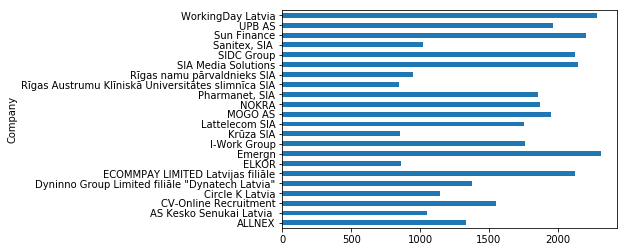

In [8]:
companies = job_list.groupby('Company')[['Monthly Salary', 'Starting Salary', 
                                         'Max Salary']].mean()

jobs_comp = job_list.groupby('Company')[['Monthly Salary']].count()
popular_comp = jobs_comp.where(jobs_comp['Monthly Salary'] > 10).dropna()

popular_comp['Salary'] = companies['Monthly Salary']
popular_comp.where(popular_comp['Salary'] > 0).dropna()['Salary'].plot(kind='barh')

positions = job_list.groupby('Title')[['Monthly Salary', 
                                         'Starting Salary', 'Max Salary']].mean()

popular_positions = job_list.groupby('Title')[['Monthly Salary']].count()
popular_positions = popular_positions.where(popular_positions['Monthly Salary']>2).dropna()
popular_positions['Salary'] = positions['Monthly Salary']
popular_positions.sort_values(by='Salary', ascending=False)

In [41]:
top_payers = popular_comp.where(
    (popular_comp['Salary'] > popular_comp['Salary'].quantile(0.75)) &
    (popular_comp['Monthly Salary'] >= popular_comp['Monthly Salary'].quantile(0.3)))
top_payers.dropna(inplace=True)
#top_payers['Positions'] = 
job_list.where((job_list['Company'].isin(top_payers.index)) &
              (job_list['Monthly Salary'] > job_list['Monthly Salary'].quantile(0.9))
              ).dropna()[['Company','Title','Monthly Salary']].sort_values(by='Company')

,Company,Title,Monthly Salary
1327,ECOMMPAY LIMITED Latvijas filiāle,PRODUCT MANAGER,3225.0
1190,ECOMMPAY LIMITED Latvijas filiāle,QA SPECIALIST,2922.5
1324,ECOMMPAY LIMITED Latvijas filiāle,DEVELOPER FOR WEBSITE SUPPORT,3372.5
1326,ECOMMPAY LIMITED Latvijas filiāle,PROJECT MANAGER,2782.5
1189,ECOMMPAY LIMITED Latvijas filiāle,SYSTEMS ANALYST,3225.0
1186,ECOMMPAY LIMITED Latvijas filiāle,PHP DEVELOPER,3372.5
839,SIA Media Solutions,TECHNICAL ACCOUNT MANAGER,3650.0
22,SIA Media Solutions,РАЗРАБОТЧИК/TEAMLEAD,3580.0
26,SIA Media Solutions,SENIOR FRONTEND DEVELOPER,3430.0
27,SIA Media Solutions,SENIOR PHP DEVELOPER,3930.0


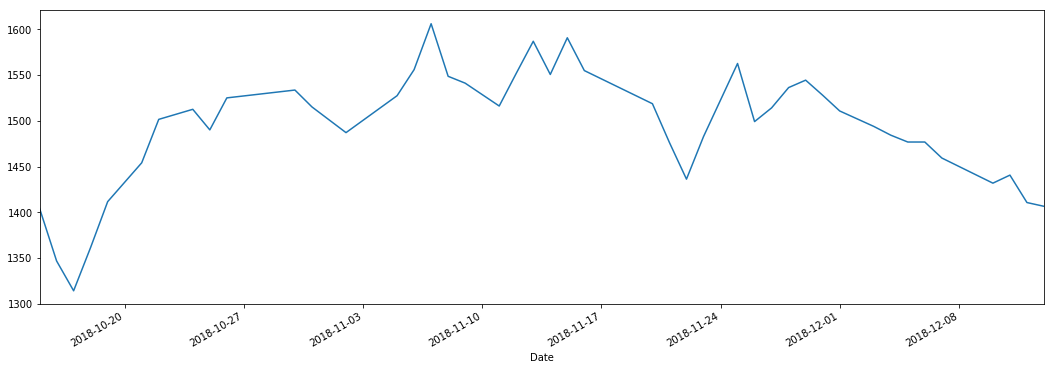

In [50]:
job_list['Date'] = pd.to_datetime(job_list['Date'])
job_list.groupby('Date')['Monthly Salary'].quantile(0.5)\
.rolling(20).mean().dropna().plot(figsize=(18,6))

In [54]:
web_page = 'https://www.cv.lv/darba-sludinajumi/visi'
web = getHTML(web_page)

web = web.find_all('div', {'class':'form-group'})